In [1]:
!pip uninstall -y qiskit qiskit-machine-learning
!pip install qiskit==0.43.0 qiskit-machine-learning==0.6.1


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.3 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 8.0 MB/s eta 0:00:0000:0100:01mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 43.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.6 

In [ ]:
import os
os.kill(os.getpid(), 9)


In [1]:
# ✅ Install required libraries (if not installed)
!pip install torch torchvision matplotlib scikit-learn numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [2]:
# ✅ Install required libraries (if not installed)
# ✅ Import Libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Set dataset paths
dataset_path = "/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images"
tumor_path = os.path.join(dataset_path, "Tumor")  # Tumor
no_tumor_path = os.path.join(dataset_path, "Healthy")  # No Tumor

# ✅ Class mapping
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to Load Images
def load_images_from_folder(folder, label, target_size=(128, 128)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

# ✅ Load Data
tumor_data, tumor_labels = load_images_from_folder(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images_from_folder(no_tumor_path, label=0)

# ✅ Ensure dataset is not empty
if len(tumor_data) == 0 or len(no_tumor_data) == 0:
    raise ValueError("Dataset is empty! Check dataset paths and image formats.")

# ✅ Combine all data
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0  # Normalize images
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)

# ✅ Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Convert Labels to One-Hot Encoding
y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

# ✅ Move Model and Data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Convert Data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# ✅ Define DataLoader
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# ✅ Create Quantum Variational Classifier (QVC)
def create_qvc():
    num_qubits = 3
    ansatz = RealAmplitudes(num_qubits, reps=2)

    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)

    qnn = EstimatorQNN(
        circuit=qc,
        input_params=[],  # No explicit feature map (direct parameterized circuit)
        weight_params=ansatz.parameters,
        input_gradients=True  
    )
    
    return qnn

# ✅ Quantum Variational Classifier Model
class QuantumVariationalClassifier(nn.Module):
    def __init__(self, quantum_layer):
        super(QuantumVariationalClassifier, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = nn.MaxPool2d(2, 2)

        self.quantum_layer = quantum_layer
        
        self.fc1 = nn.Linear(246017, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)

        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)  
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)

        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Initialize Quantum Variational Classifier Model
qnn = create_qvc()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumVariationalClassifier(quantum_layer).to(device)

# ✅ Store training and testing metrics
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# ✅ Train Function
# ✅ Train Function with Early Stopping
def fit_quantum_model(model, train_loader, test_loader, epochs=50, save_path="quantum_vqc_model.pth", patience=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_loss = float("inf")
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        train_loss, correct_train, total_train = 0, 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
            total_train += y_batch.size(0)

        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = correct_train / total_train * 100

        # ✅ Evaluate on Test Data
        model.eval()
        test_loss, correct_test, total_test = 0, 0, 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                test_loss += loss.item()
                correct_test += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
                total_test += y_batch.size(0)

        avg_test_loss = test_loss / len(test_loader)
        test_accuracy = correct_test / total_test * 100

        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs} — Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

        # ✅ Early Stopping Logic
        if avg_test_loss < best_loss:
            best_loss = avg_test_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), save_path)
        else:
            epochs_no_improve += 1
            print(f"🔸 No improvement in test loss for {epochs_no_improve} epoch(s)")

        if epochs_no_improve >= patience:
            print(f"🛑 Early stopping triggered after {epoch+1} epochs. Best test loss: {best_loss:.4f}")
            break

    print(f"✅ Best model saved at {save_path}")

# ✅ Train Model
fit_quantum_model(quantum_model, train_loader, test_loader, epochs=10, patience=5)


Epoch 1/10 — Train Acc: 80.80%, Test Acc: 91.20%, Train Loss: 0.4373, Test Loss: 0.1964
Epoch 2/10 — Train Acc: 95.60%, Test Acc: 94.50%, Train Loss: 0.1250, Test Loss: 0.1632
Epoch 3/10 — Train Acc: 98.28%, Test Acc: 96.70%, Train Loss: 0.0482, Test Loss: 0.1235
Epoch 4/10 — Train Acc: 99.60%, Test Acc: 96.40%, Train Loss: 0.0137, Test Loss: 0.1617
🔸 No improvement in test loss for 1 epoch(s)
Epoch 5/10 — Train Acc: 99.28%, Test Acc: 95.30%, Train Loss: 0.0204, Test Loss: 0.1981
🔸 No improvement in test loss for 2 epoch(s)
Epoch 6/10 — Train Acc: 99.20%, Test Acc: 95.30%, Train Loss: 0.0239, Test Loss: 0.1990
🔸 No improvement in test loss for 3 epoch(s)
Epoch 7/10 — Train Acc: 99.58%, Test Acc: 96.00%, Train Loss: 0.0149, Test Loss: 0.2101
🔸 No improvement in test loss for 4 epoch(s)
Epoch 8/10 — Train Acc: 99.55%, Test Acc: 97.20%, Train Loss: 0.0107, Test Loss: 0.2069
🔸 No improvement in test loss for 5 epoch(s)
🛑 Early stopping triggered after 8 epochs. Best test loss: 0.1235
✅ Bes

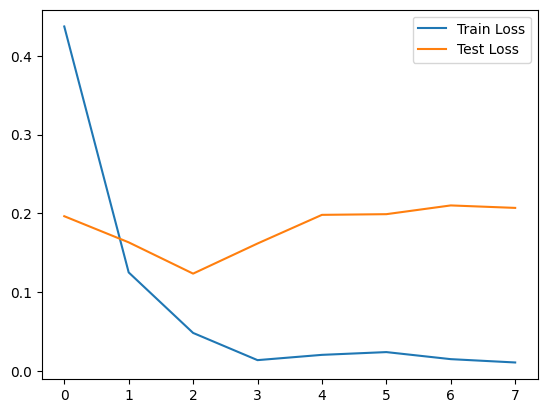

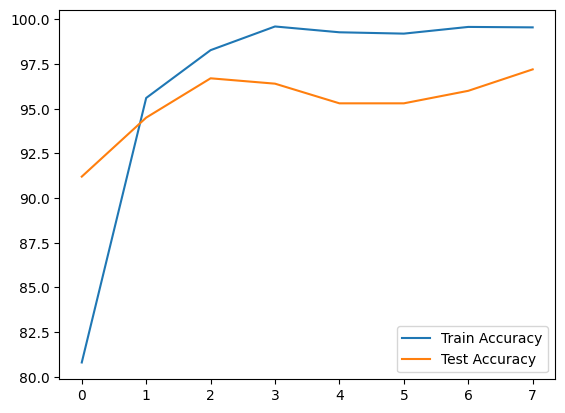

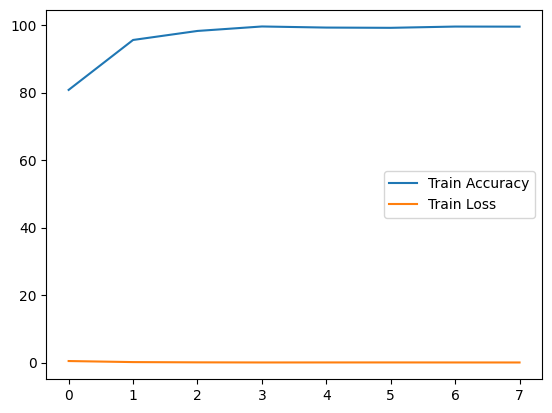

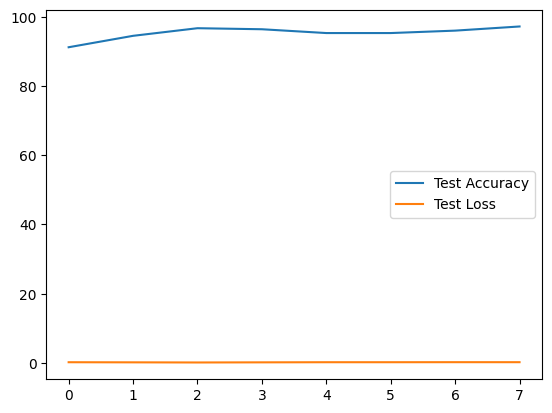

In [3]:
# ✅ Plot Graphs
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.legend()
plt.show()

# ✅ Plot Graphs
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(train_losses, label="Train Loss")
plt.legend()
plt.show()

plt.plot(test_accuracies, label="Test Accuracy")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()


🔹 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.96      0.96      0.96       400
       Tumor       0.98      0.98      0.98       600

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



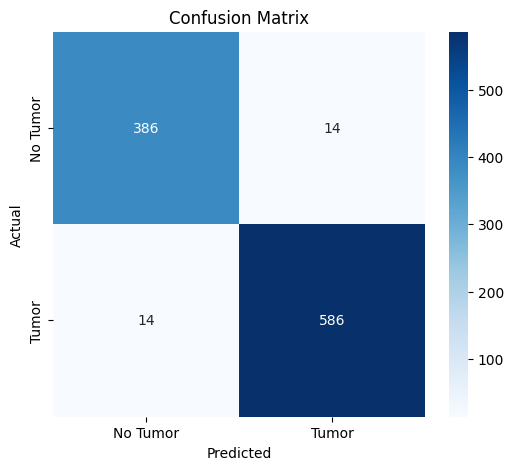

<Figure size 800x500 with 0 Axes>

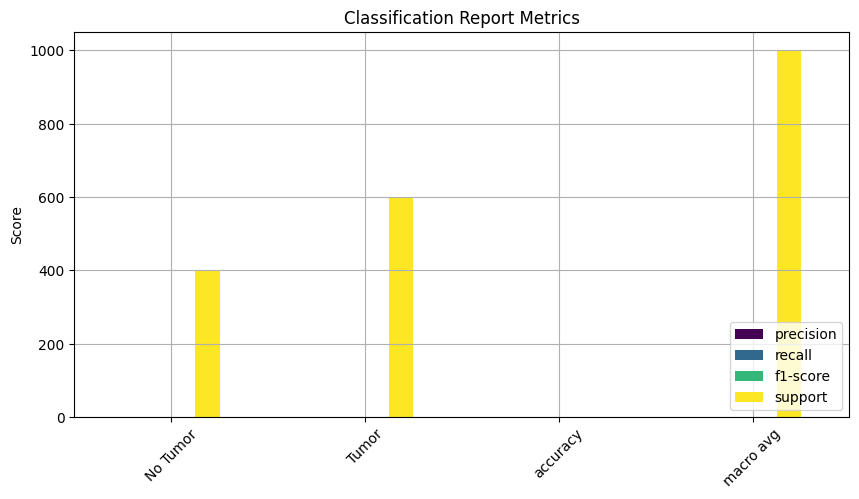

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# ✅ Evaluate Model on Test Data
y_true, y_pred = [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(labels)

# ✅ Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"])
print("\n🔹 Classification Report:\n")
print(report)

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Convert Classification Report to DataFrame for Bar Chart
report_dict = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# ✅ Plot Classification Report Metrics as Bar Chart
plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


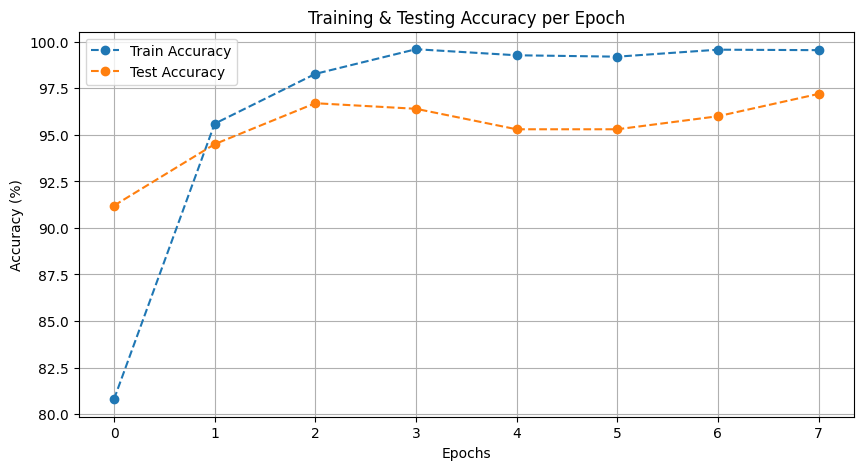

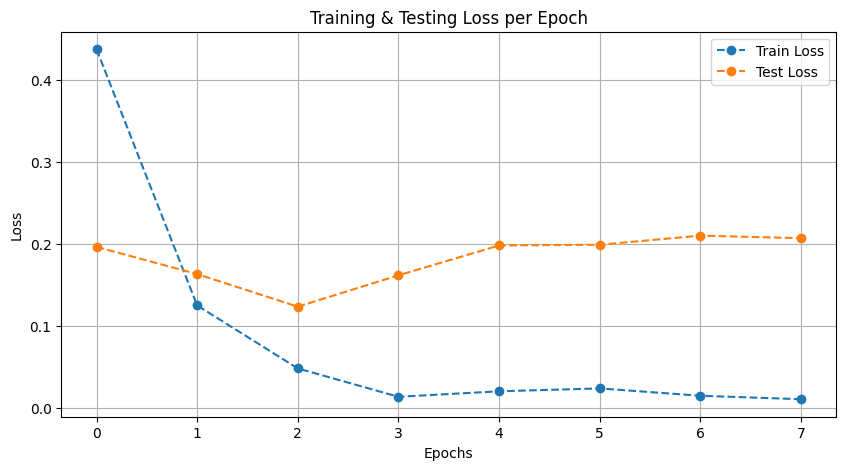


🔹 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.96      0.96      0.96       400
       Tumor       0.98      0.98      0.98       600

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



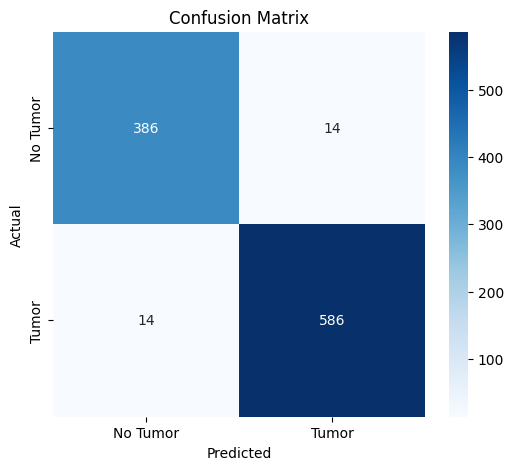

<Figure size 800x500 with 0 Axes>

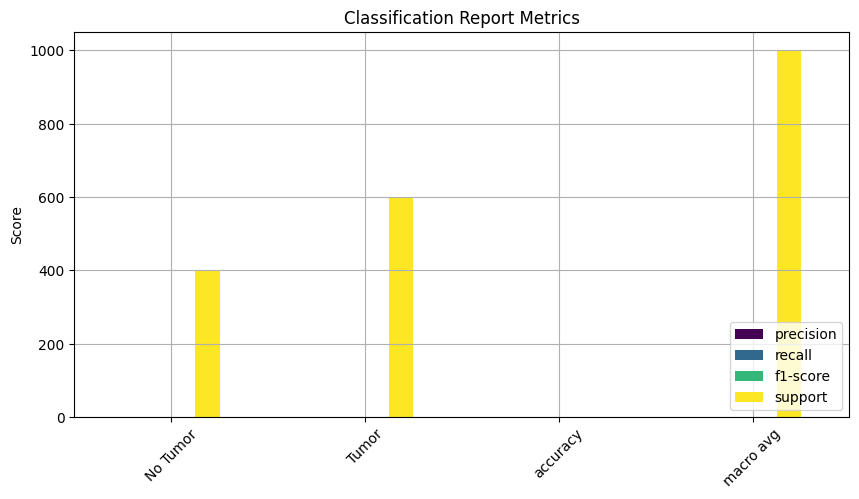

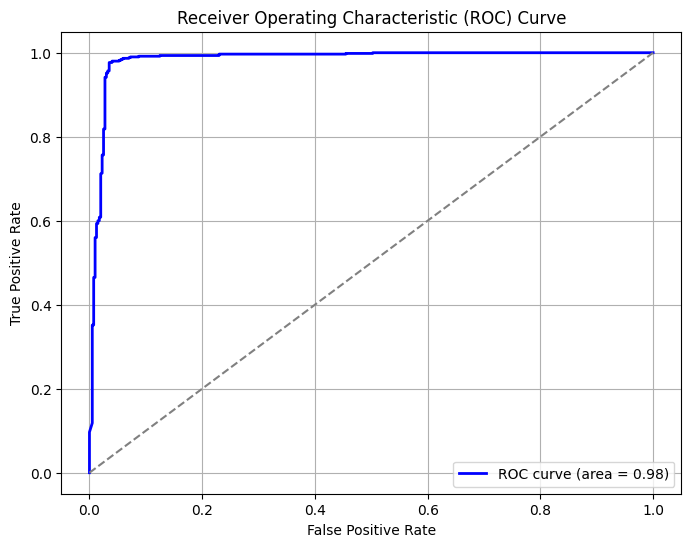

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ✅ 1️⃣ Plot Training & Testing Accuracy per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy", marker='o', linestyle='dashed')
plt.plot(test_accuracies, label="Test Accuracy", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Testing Accuracy per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 2️⃣ Plot Training & Testing Loss per Epoch
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss", marker='o', linestyle='dashed')
plt.plot(test_losses, label="Test Loss", marker='o', linestyle='dashed')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Testing Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 3️⃣ Evaluate Model on Test Data
y_true, y_pred, y_prob = [], [], []
quantum_model.eval()

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = quantum_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        probs = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()[:, 1]  # Get probabilities for class "Tumor"
        labels = torch.argmax(y_batch, dim=1).cpu().numpy()
        
        y_pred.extend(preds)
        y_true.extend(labels)
        y_prob.extend(probs)

# ✅ 4️⃣ Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"])
print("\n🔹 Classification Report:\n")
print(report)

# ✅ 5️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# ✅ 6️⃣ Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ 7️⃣ Convert Classification Report to DataFrame for Bar Chart
report_dict = classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# ✅ 8️⃣ Plot Classification Report Metrics as Bar Chart
plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :].plot(kind='bar', figsize=(10, 5), colormap="viridis")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ✅ 9️⃣ ROC Curve (Receiver Operating Characteristic Curve)
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [7]:
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Load the trained model
model_path = "quantum_vqc_model.pth"  # Ensure this is the correct model path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Reinitialize the Quantum Variational Classifier
def create_qvc():
    from qiskit.circuit.library import RealAmplitudes
    from qiskit import QuantumCircuit
    from qiskit_machine_learning.neural_networks import EstimatorQNN

    num_qubits = 3
    ansatz = RealAmplitudes(num_qubits, reps=2)

    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)

    qnn = EstimatorQNN(
        circuit=qc,
        input_params=[],  # No explicit feature map
        weight_params=ansatz.parameters,
        input_gradients=True
    )

    return qnn

class QuantumVariationalClassifier(torch.nn.Module):
    def __init__(self, quantum_layer):
        super(QuantumVariationalClassifier, self).__init__()

        self.conv1 = torch.nn.Conv2d(3, 32, 3, 1, 0)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1, 0)
        self.pool = torch.nn.MaxPool2d(2, 2)

        self.quantum_layer = quantum_layer
        
        self.fc1 = torch.nn.Linear(246017, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 2)

        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1)  
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)

        x = torch.cat((x, quantum_out), dim=1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Initialize Model
qnn = create_qvc()
quantum_layer = TorchConnector(qnn)
quantum_model = QuantumVariationalClassifier(quantum_layer).to(device)
quantum_model.load_state_dict(torch.load(model_path, map_location=device))
quantum_model.eval()

# ✅ Class labels
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Function to preprocess image
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        image = Image.open(image_path).convert("RGB").resize(target_size)
        image = np.array(image) / 255.0  # Normalize
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# ✅ Function to predict tumor presence
def predict_image(image_path):
    image_tensor = preprocess_image(image_path)
    if image_tensor is None:
        return

    with torch.no_grad():
        output = quantum_model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()

    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Take user input for image path and predict
image_path = input("Enter the path of the brain MRI image: ")
predict_image(image_path)


Enter the path of the brain MRI image:  /kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images/Tumor/glioma (1).jpg



🔹 Prediction: Tumor
